Before you turn this problem in, make sure everything runs as expected. 

1. **Restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then
2. **Run all cells** (in the menubar, select Cell $\rightarrow$ Run All).
3. **Save the notebook**

Do fix all your errors before submitting.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

## Housing data

The Excel file `housing.xslx` contains information from a survey conducted on residents at a complex containing several housing types. However, note that we do not have one row per resident. Instead, we have a collated dataset, with one row for each unique response combination. Here is a brief description of the columns:

1. `housing`: The type of housing, e.g. tower blocks, apartments, atrium houses, and terraced houses.
2. `influence`: The amount of perceived influence an individual had on management of the housing complex. (low/medium/high).
3. `contact`: The amount of contact that residents had with housing management (low/high).
4. `satisfaction`: The level of satisfaction that residents had with the housing (low/medium/high).
5. `count`: The number of residents that responded as indicated in the row.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

housing_df = pd.read_excel("data/housing.xlsx")

### Question 1

We are going to ignore the column `influence` in the rest of the analysis. Create a dataframe `grouped_df` that sums the counts for each unique combination of housing, contact and satisfaction. The final dataframe should have 24 rows and 4 columns (`housing`, `contact`, `satisfaction` and `count`).

In [3]:
# grouped_df = ...

# YOUR CODE HERE
grouped_df = housing_df[['housing', 'contact', 'satisfaction', 'count']]
grouped_df = grouped_df.groupby(['housing', 'contact', 'satisfaction'], as_index=False).sum()
grouped_df

,housing,contact,satisfaction,count
0,apartments,high,high,191
1,apartments,high,low,141
2,apartments,high,medium,116
3,apartments,low,high,111
4,apartments,low,low,130
5,apartments,low,medium,76
6,atrium houses,high,high,65
7,atrium houses,high,low,37
8,atrium houses,high,medium,55
9,atrium houses,low,high,31


### Question 2

Inspect the following code and run it. In the markdown cell below, explain clearly what the following line does.

```
housing_data_pivot = housing_data.pivot(index='contact', columns='satisfaction', values='count')
```

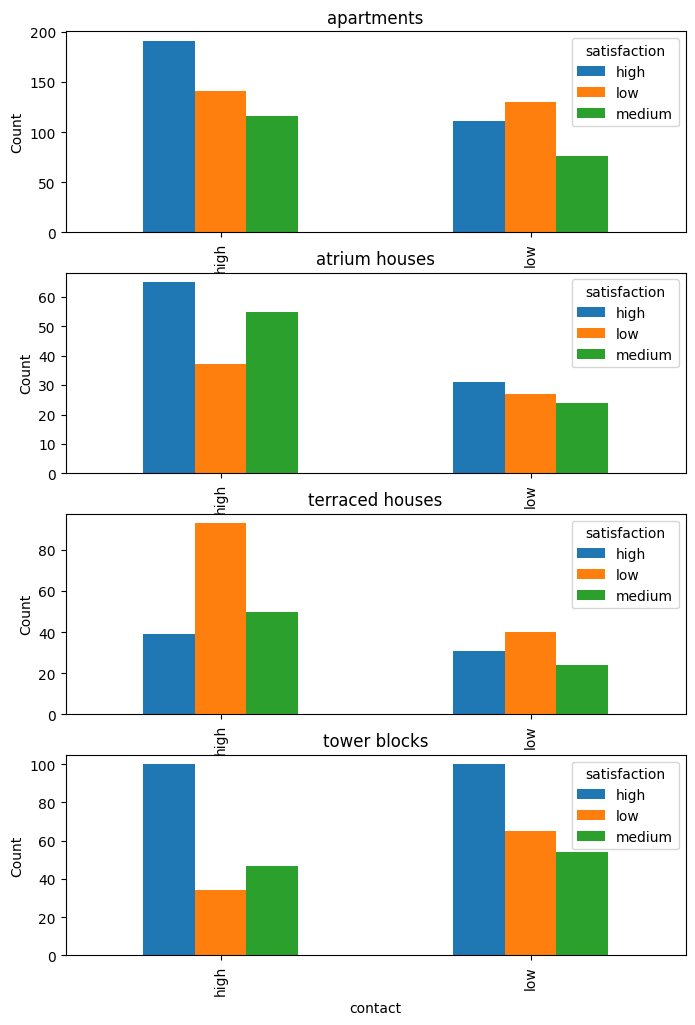

In [4]:
housing_types = grouped_df['housing'].unique()
fig, axes = plt.subplots(4, 1, figsize=(8, 12))

for ax, housing in zip(axes, housing_types):
    housing_data = grouped_df[grouped_df['housing'] == housing]
    housing_data_pivot = housing_data.pivot(index='contact', columns='satisfaction', values='count')
    
    housing_data_pivot.plot(kind='bar', ax=ax, title=housing, legend=True)
    ax.set_ylabel('Count')

Note that `pivot()` method reshape the DataFrame organized by given index / column values.

It will reshape data based on column values. Uses unique values from specified index / columns to form axes of the resulting DataFrame.

This line convert the DataFrame from a long format to a wide format so that satisfaction categories become separate columns while x-axis represents contact, each bar represents a satisfaction category and y-axis represents count. In other words, this line "divide" one tables to four tables under different `contact`.


### Question 3

Complete the following code that will create a series of 2x3 contingency tables - one for each housing type. In the end, the numpy array `array_4x2x3` should have shape (4,2,3).

In [5]:
# Define the order for 'contact' and 'satisfaction'
contact_order = ['low', 'high']
satisfaction_order = ['low', 'medium', 'high']
housing_order = grouped_df['housing'].unique()

# Create a 4x2x3 numpy array with zeros
array_4x2x3 = np.zeros((len(housing_order), len(contact_order), len(satisfaction_order)))

# Populate the array
for i, housing in enumerate(housing_order):
    for j, contact in enumerate(contact_order): 
        for k, satisfaction in enumerate(satisfaction_order):
            filtered_series = grouped_df[(grouped_df['housing'] == housing) & 
                                        (grouped_df['contact'] == contact) & 
                                        (grouped_df['satisfaction'] == satisfaction)]['count']
            # YOUR CODE HERE
            if not filtered_series.empty:
                array_4x2x3[i,j,k] = float(filtered_series.iloc[0])
            else:
                array_4x2x3[i,j,k] = 0.0

array_4x2x3

array([[[130.,  76., 111.],
        [141., 116., 191.]],

       [[ 27.,  24.,  31.],
        [ 37.,  55.,  65.]],

       [[ 40.,  24.,  31.],
        [ 93.,  50.,  39.]],

       [[ 65.,  54., 100.],
        [ 34.,  47., 100.]]])

### Question 4

Apply the $\chi^2$-test for independence of categorical variables to the 2x3 table for each housing type at 5% level. Be sure to:

1. Print out each $p$-value,
2. Check any assumptions required, and 
3. State your final conclusions.

Create any code/markdown cells you need below this one:

In [6]:
for i, housing in enumerate(housing_order):
    chi2, p_value, dof, expected = stats.chi2_contingency(array_4x2x3[i])
    # print p value
    print(f"{housing}: {p_value}")
    # state conclusion
    if p_value < 0.05:
        print(f"Under {housing}, We do not have enough evidence to conclude that contact and satisfcation are not indpendent")
    else:
        print(f"Under {housing}, We can conclude that contact and satisfcation are not indpendent")

apartments: 0.02057911123702632
Under apartments, We do not have enough evidence to conclude that contact and satisfcation are not indpendent
atrium houses: 0.2898054778332235
Under atrium houses, We can conclude that contact and satisfcation are not indpendent
terraced houses: 0.11850529521084015
Under terraced houses, We can conclude that contact and satisfcation are not indpendent
tower blocks: 0.036113721842121145
Under tower blocks, We do not have enough evidence to conclude that contact and satisfcation are not indpendent


Conclusion

$$H_0: \text{Contact and Satisfaction are independent}$$

$$H_1: \text{Contact and Satisfaction are not independent}$$

- For apartments and tower blocks, note that p value is less than $5\%$, so we do not have sufficient evidence to conclude contact and satisfaction are not independent a.k.a. we can not reject $H_0$
- For atrium houses and terraced houses, note that p value is greater than $5\%$ we can conclude that contact and satisfaction are not independent, a.k.a. reject $H_0$